### Task 1. Create a function that takes the address of a folder on disk as an argument and returns a dataframe with the following information about the images in the folder:
- file name;
- color model;
- format;
- the number of channels in the image;
- file size in megabytes, rounded to two decimal places;
- image width;
- picture height;
- full path to the file;
- reduced image. 

In [1]:
import pandas as pd
import os
import filetype
import base64
import random
from typing import List
from PIL import Image, ImageOps
from io import BytesIO
from IPython.display import HTML

In [2]:
def get_images_from_dir(path: str) -> List[Image.Image]:
    if (os.path.exists(path) and os.path.isdir(path)):
        result = []
        for file in os.listdir(path):
            fullpath = os.path.join(path, file)
            if (filetype.is_image(fullpath)):
                result.append(Image.open(fullpath))
        return result
    raise ValueError('Invalid directory path')

In [3]:
def get_thumbnail(path: str) -> Image.Image:
    img = Image.open(path)
    if img.mode in ['CMYK']:
        img = img.convert('RGB')
    img.thumbnail((150, 150), Image.LANCZOS)
    return img

def image_base64(img: str) -> str:
    img = get_thumbnail(img)
    with BytesIO() as buffer:
        img.save(buffer, 'png')
        return base64.b64encode(buffer.getvalue()).decode()

In [4]:
def images_to_dataframe(path: str) -> pd.DataFrame:
    images = get_images_from_dir(path)  # Assuming this function fetches image objects
    rows = []

    for img in images:
        rows.append({
            'name': os.path.basename(img.filename),
            'color model': img.mode,
            'format': img.format,
            'channels': len(img.getbands()),
            'size': os.path.getsize(img.filename) / (1024 * 1024),  # Size in MB
            'width': img.width,
            'height': img.height,
            'fullpath': img.filename,
            'image': f'<img src="data:image/png;base64,{image_base64(img.filename)}">'
        })
        
    return pd.DataFrame(rows, columns=['name', 'color model', 'format', 'channels', 'size', 'width', 'height', 'fullpath', 'image'])


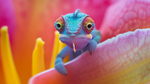
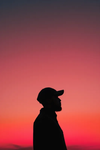
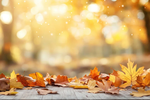
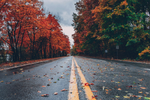
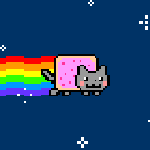
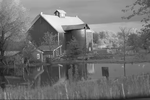
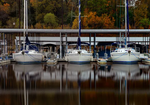
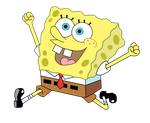
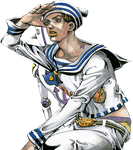

In [5]:
df = images_to_dataframe(r'D:\ХПІ\PYTHON\python-data-analysis\Lab5\images')
HTML(df.to_html(escape=False))

### Task 2. Create a function that accepts as an argument:

- the path to the folder;
- the name of the source image;
- the number of images in a row;
- the number of images in a column


and returns the poster image.
Poster is rectangular and the number of pictures in the poster is a × b, where a is the number of columns and b is the number of rows.

In [6]:
def crop_to_square(img: Image.Image) -> Image.Image:
    size = min(img.size)
    left = (img.width - size) / 2
    top  = (img.height - size) / 2
    return img.crop((left, top, left + size, top + size))

In [8]:
def create_poster(path: str, filename: str, cols: int, rows: int) -> Image.Image:
    images = random.choices(get_images_from_dir(path), k=cols * rows)
    colors = ['red', 'green', 'blue', 'yellow', 'purple', 'cyan']
    size = min(img.width for img in images)
    
    poster = Image.new(mode='RGB', size=(size * cols, size * rows))

    for i in range(rows):
        for j in range(cols):
            image = images[i * cols + j].resize((size, size)).convert('L')
            image = crop_to_square(image)
            colored_image = ImageOps.colorize(image, black='black', white=random.choice(colors))
            poster.paste(colored_image, (j * size, i * size))
    
    poster.save(os.path.join('posters', filename))

    return poster

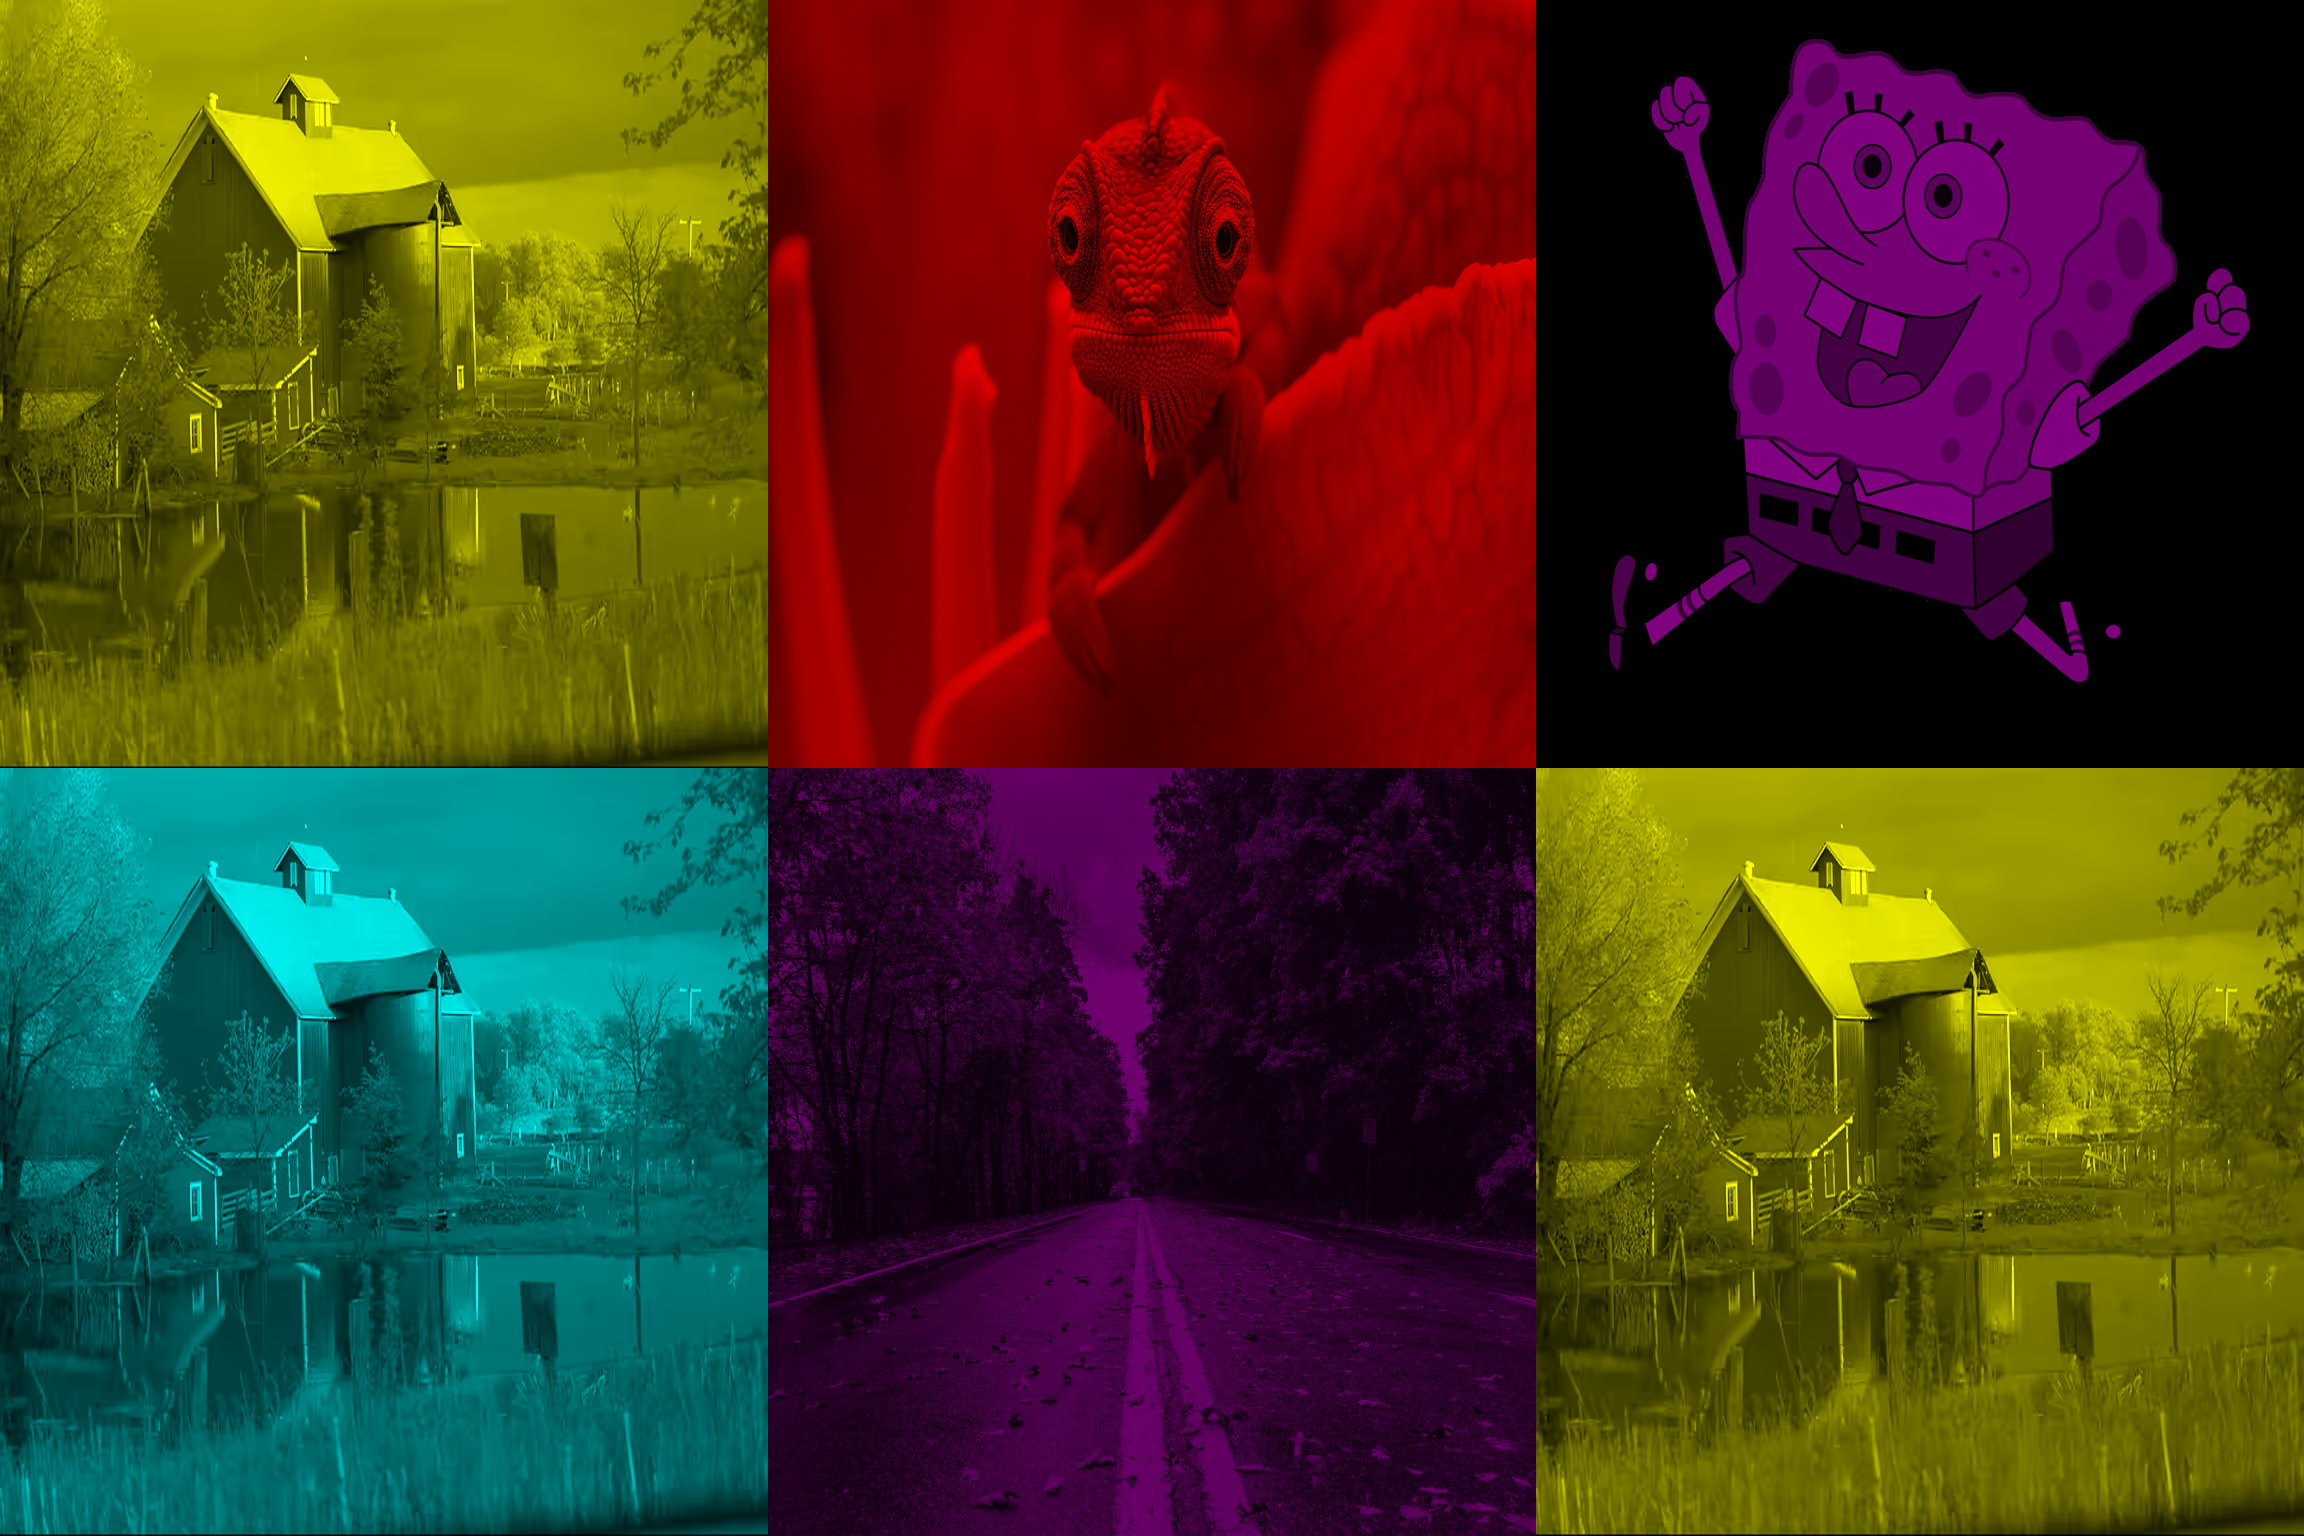

In [9]:
create_poster(r'D:\ХПІ\PYTHON\python-data-analysis\Lab5\images', 'poster3x2.png', 3, 2)

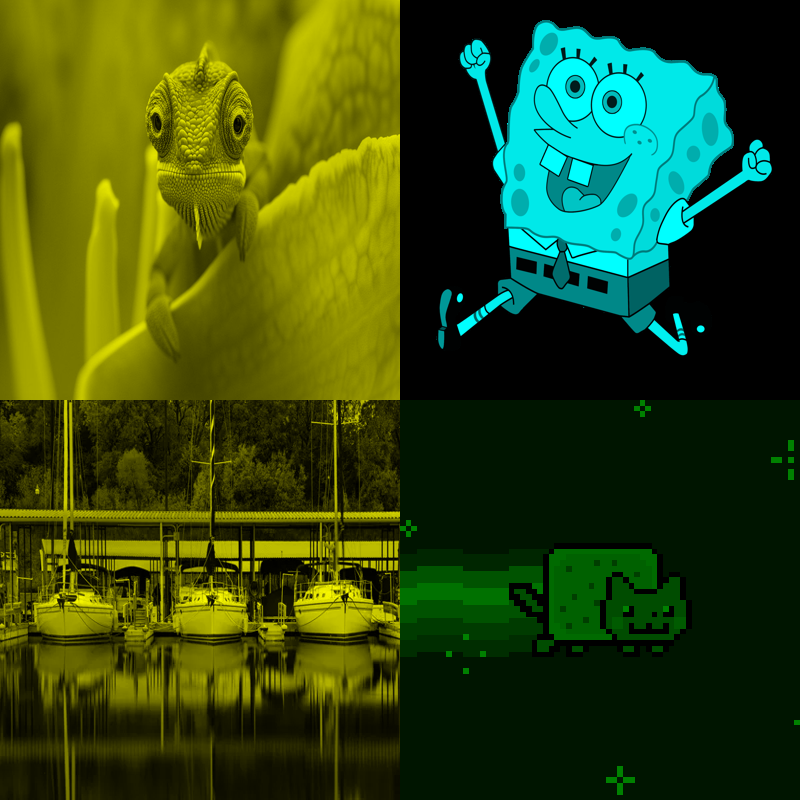

In [10]:
create_poster(r'D:\ХПІ\PYTHON\python-data-analysis\Lab5\images', 'poster2x2.png', 2, 2)